# Assignement 1
## Digital Musicology

@authors: JorisMonnet, Pannnnestrella, YutakaOsaki, Yiwei Liu

Due Date: 27/03/2024

In [ ]:
pip install music21


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Task A: Timing Function

## Task B: Empirical findings

### 1. Subcorpus Analysis

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [126]:
def get_rawdata(path):
    columns = ["start", "end", "b"]
    scores = pd.read_table(path, sep='\t', names=columns)
    scores["b"][0] = scores["b"][0].split(",")[0]
    return scores
def get_dis(score_name):
    list_dis = []
    for i in range(len(score_name)-1):
        list_dis.append(score_name["start"][i+1] - score_name["start"][i])
    return list_dis
def violinplot_eachpart(scores, original_scores, artist):
    list_original = get_dis(original_scores)
    list_dbbb_ =  get_dis(scores)
    list_dbbb = []
    for i in range(0, len(list_dbbb_), 3):
        try:
            tmp_list = [list_dbbb_[i] - list_original[i], list_dbbb_[i+1] - list_original[i+1], list_dbbb_[i+2] - list_original[i+2]]
            list_dbbb.append(tmp_list)
        except:pass
    x, y, z = zip(*list_dbbb)
    list_labels = ["db", "2b", "3b"]
    dividing_point = [0, len(z)//4,len(z)//4*2,len(z)//4*3,len(z)]
    fig, ax = plt.subplots()
    ax.set_ylim([-0.5,  0.5])
    ax.set_title(f"Distribution of sound duration by {artist}")
    ax.set_ylabel("shorter        -        original        -        longer")
    ax.set_xticks(np.arange(1, len(list_labels) + 1), labels=list_labels)
    ax.violinplot([list(x), list(y), list(z)])
    fig, ax = plt.subplots(1, len(dividing_point)-1, figsize=(20, 5))  # 1行に4つのプロット、適切なサイズを設定 
    for i in range(len(dividing_point)-1):
        list_all = [list(x)[dividing_point[i]:dividing_point[i+1]], 
                list(y)[dividing_point[i]:dividing_point[i+1]], 
                list(z)[dividing_point[i]:dividing_point[i+1]]]
        ax[i].set_ylim([-0.5,  0.5])
        ax[i].violinplot(list_all)
        ax[i].set_xticks(np.arange(1, len(list_labels) + 1))
        ax[i].set_xticklabels(list_labels)  # x軸のラベルを設定
        ax[i].set_title(f"distribution in {i+1} / 4 part by {artist}")
        ax[i].set_ylabel("shorter        -        original        -        longer")

    plt.tight_layout()  # グラフ同士が重ならないようにレイアウトを調整
    plt.show()
    return
def plot_third_part(scores, original):
    list_dbbb_ =  get_dis(scores)
    list_original = get_dis(original)
    list_dbbb = []
    for i in range(len(list_dbbb_)):
        list_dbbb.append(list_dbbb_[i] - list_original[i])
    plt.plot(list(TET01_scores["start"][171*2:171*3]), list_dbbb[171*2:171*3])
    plt.xlabel("Elapsed time")
    plt.ylabel("duration compared to original scores")
    plt.show()
    return

In [125]:
ADIG01_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-1/ADIG01_annotations.txt')
MunA03M_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-1/MunA03M_annotations.txt')
TET01_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-1/TET01_annotations.txt')
Original_scores = get_rawdata('asap-dataset/Mozart/Piano_Sonatas/12-1/midi_score_annotations.txt')

/var/folders/d_/kl86q6ys5z7cfcv2_by739rh0000gn/T/ipykernel_91977/4020022095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["b"][0] = scores["b"][0].split(",")[0]
/var/folders/d_/kl86q6ys5z7cfcv2_by739rh0000gn/T/ipykernel_91977/4020022095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["b"][0] = scores["b"][0].split(",")[0]
/var/folders/d_/kl86q6ys5z7cfcv2_by739rh0000gn/T/ipykernel_91977/4020022095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

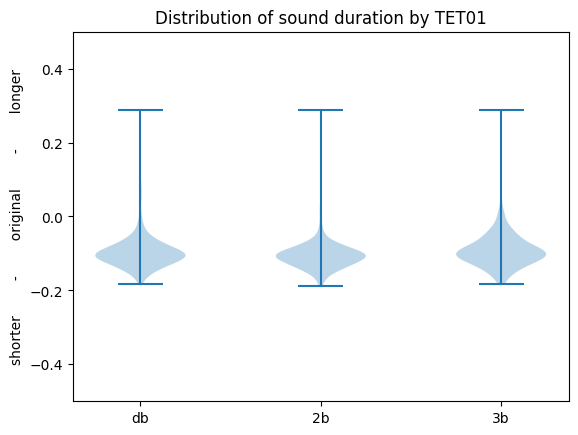

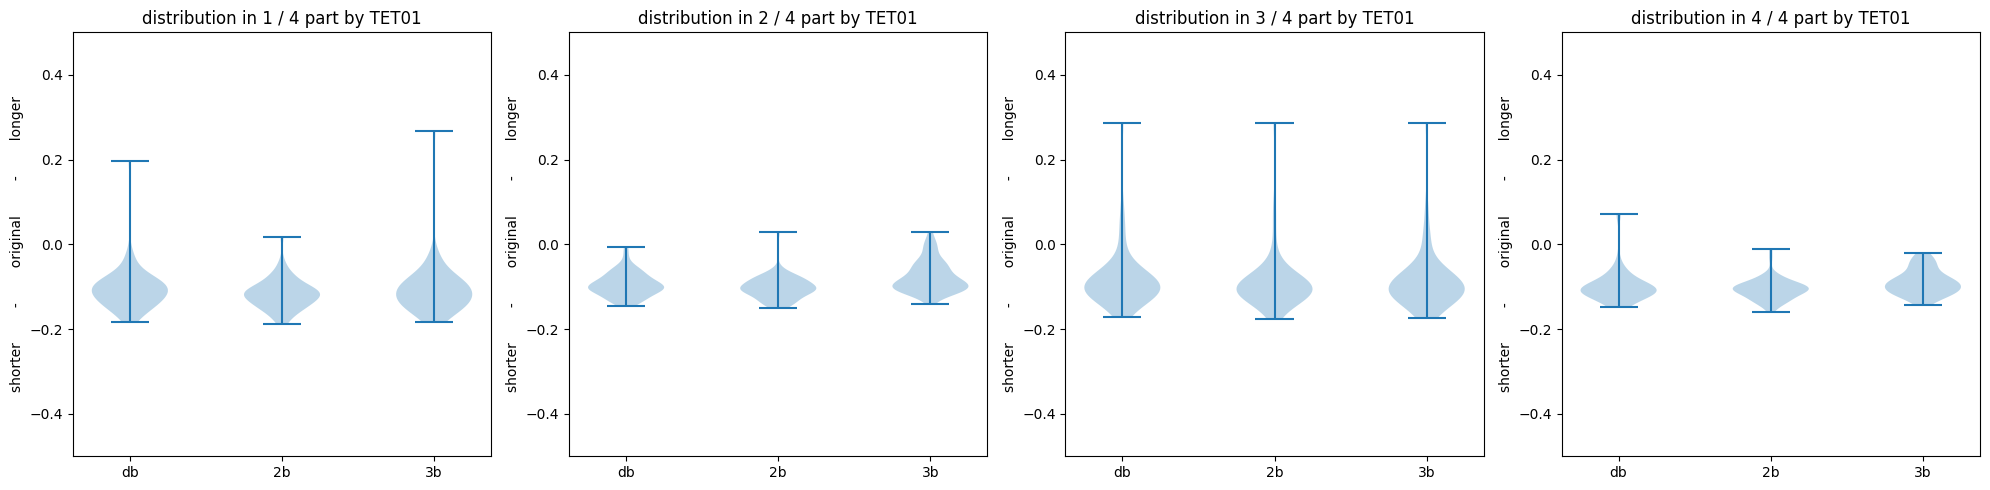

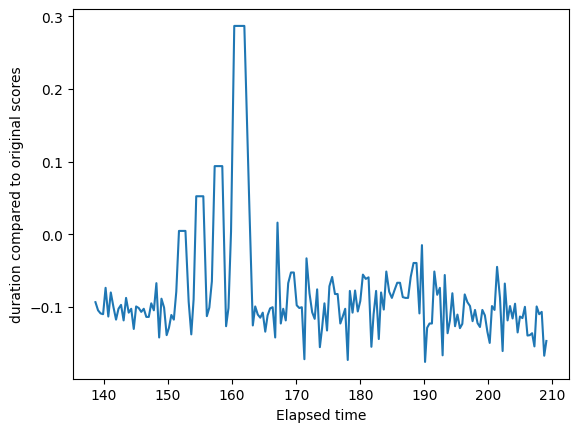

In [127]:
violinplot_eachpart(TET01_scores, Original_scores, "TET01")
plot_third_part(TET01_scores, Original_scores)

In [100]:
# TODO:
# What is the distribution of note onsets on metrical locations? 
# Answer this question separately for different time signatures. 
# At least do 4/4 and 3/4 time signatures. Illustrate your finding with figures.

In [101]:
# TODO:
# Where in the metrical grid are expressive timing likely to happen? 
# Support it with quantitative evidence. Illustrate your finding with figures.

In [102]:
# TODO:
# Think about another empirical question that you can verify from this data, and present your findings.
# 
#     (Easy example) which style has the most variability in timing.

In [103]:
# TODO:
#  (Difficult example) How well can your model generalize across different styles?

TODO: report your findings